<a href="https://colab.research.google.com/github/sholaypompey/project-sampling/blob/main/Diabetes%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/archive (4).zip" -d "/content/drive/MyDrive/Diabetes_dataset"

unzip:  cannot find or open /archive (4).zip, /archive (4).zip.zip or /archive (4).zip.ZIP.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
diabetes_data = pd.read_csv("/content/drive/MyDrive/Diabetes_dataset/diabetes_prediction_dataset.csv")
diabetes_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
diabetes_data.info

<bound method DataFrame.info of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              

In [5]:
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
diabetes_data.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [7]:
diabetes_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
diabetes_data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [9]:
gender_data = diabetes_data.groupby("gender").mean()
gender_data

<ipython-input-9-9cfb3fe021ae>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_data = diabetes_data.groupby("gender").mean()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,
Female,42.463291,0.071680,0.026677,27.449287,5.509477,137.468951,0.076189
Male,41.075139,0.079363,0.057446,27.139108,5.553041,138.890031,0.097490
Other,29.555556,0.000000,0.000000,27.379444,5.405556,139.444444,0.000000


In [10]:
pd.crosstab(diabetes_data["gender"], diabetes_data["diabetes"]) #where 1 indicates diabetic and 0 indicates non_diabetic

diabetes,0,1
gender,,
Female,54091,4461
Male,37391,4039
Other,18,0


In [11]:
# Chnage the non-numerical values into numerical.
for label, content in diabetes_data.items():
  if not pd.api.types.is_numeric_dtype(content):
    diabetes_data[label] = pd.Categorical(content).codes+1

In [12]:
diabetes_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,5,25.19,6.6,140,0
1,1,54.0,0,0,1,27.32,6.6,80,0
2,2,28.0,0,0,5,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,2,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,1,27.32,6.2,90,0
99996,1,2.0,0,0,1,17.37,6.5,100,0
99997,2,66.0,0,0,4,27.83,5.7,155,0
99998,1,24.0,0,0,5,35.42,4.0,100,0


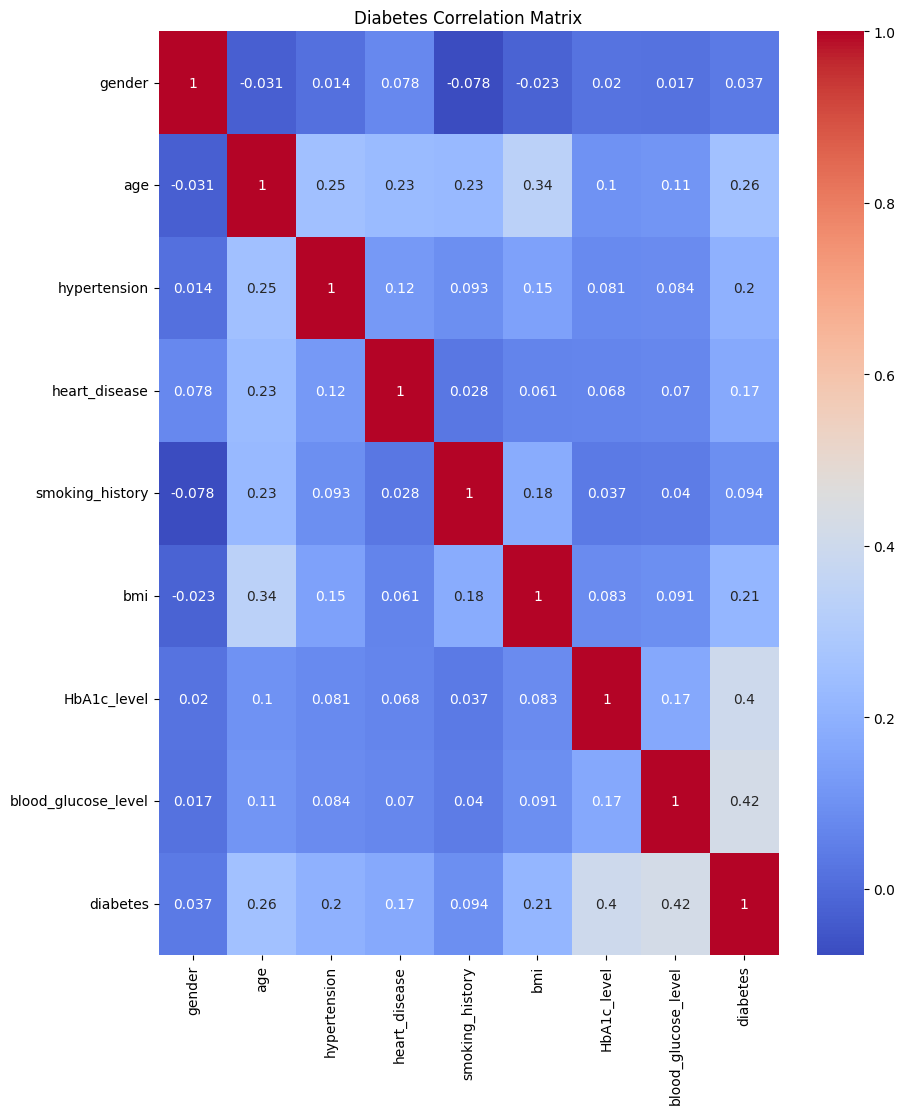

In [13]:
#Visualize our data
correlation_matrix = diabetes_data.corr()
plt.figure(figsize = (10,12))
sns.heatmap(correlation_matrix, annot= True, cmap= "coolwarm")
plt.title("Diabetes Correlation Matrix")
plt.show()

## Model Implementation

In [14]:
X = diabetes_data.drop("diabetes", axis = 1)
y = diabetes_data["diabetes"]
X.head(), y.head()

(   gender   age  hypertension  heart_disease  smoking_history    bmi  \
 0       1  80.0             0              1                5  25.19   
 1       1  54.0             0              0                1  27.32   
 2       2  28.0             0              0                5  27.32   
 3       1  36.0             0              0                2  23.45   
 4       2  76.0             1              1                2  20.14   
 
    HbA1c_level  blood_glucose_level  
 0          6.6                  140  
 1          6.6                   80  
 2          5.7                  158  
 3          5.0                  155  
 4          4.8                  155  ,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: diabetes, dtype: int64)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(80000, 20000, 80000, 20000)

In [16]:
# Instatiate our model
clf = RandomForestClassifier()
# Train our model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
# Evaluate our model
clf.score(X_test, y_test)

0.97015

In [18]:
# Predict our model
y_preds = clf.predict(X_test)
y_preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# Compare our prediction with true value
y_preds[:20] == np.array(y_test[:20])

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True])

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
roc = roc_auc_score(y_test, y_preds)

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1: {f1}")
print(f"Roc_Auc: {roc}")

Accuracy: 0.97%
Precision: 0.9469026548672567
Recall: 0.6891100702576113
f1: 0.7976956963741105
Roc_Auc: 0.8427509677769578


In [21]:
# Create a confusion metrics
cm = confusion_matrix(y_test, y_preds)
cm

array([[18226,    66],
       [  531,  1177]])

<Axes: >

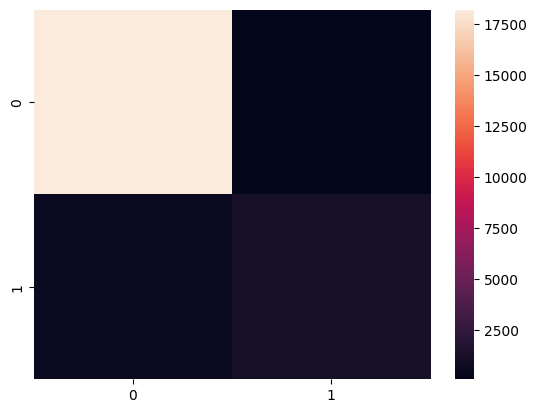

In [22]:
# Plot confusion metrics
sns.heatmap(cm)

##Prediction probabilities

In [23]:
y_probs = clf.predict_proba(X_test)
y_probs[:20]

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.81, 0.19],
       [0.77, 0.23],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [24]:
y_preds[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

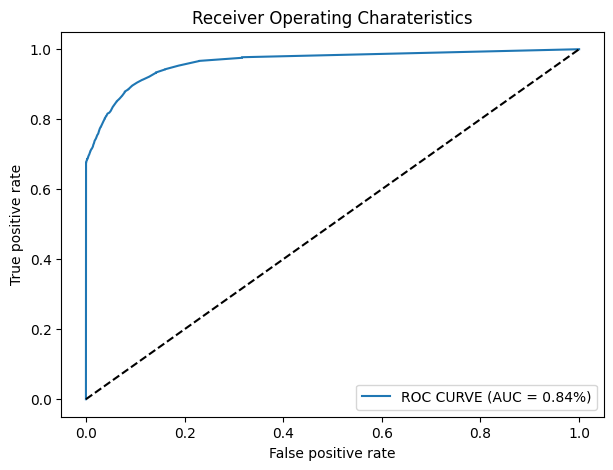

In [26]:
# Probabilities for positive predictions
y_probs = clf.predict_proba(X_test)[:, 1]
y_probs

# calculate true positive rate and false positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize = (7, 5))
plt.plot(fpr, tpr, label = f"ROC CURVE (AUC = {roc:.2f}%)")
plt.plot([0,1],[0,1], "k--")
plt.title("Receiver Operating Charateristics")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc = "lower right")
plt.show()

In [27]:
feat_imp = clf.feature_importances_
feat_imp

array([0.0067059 , 0.09984036, 0.01507979, 0.01020735, 0.02800737,
       0.12032507, 0.40796111, 0.31187305])

In [28]:
feat_df = pd.DataFrame({"Feature": X_test.columns, "Importances": feat_imp})
feat_df = feat_df.sort_values("Importances", ascending = False)
feat_df

,Feature,Importances
6,HbA1c_level,0.407961
7,blood_glucose_level,0.311873
5,bmi,0.120325
1,age,0.099840
4,smoking_history,0.028007
2,hypertension,0.015080
3,heart_disease,0.010207
0,gender,0.006706


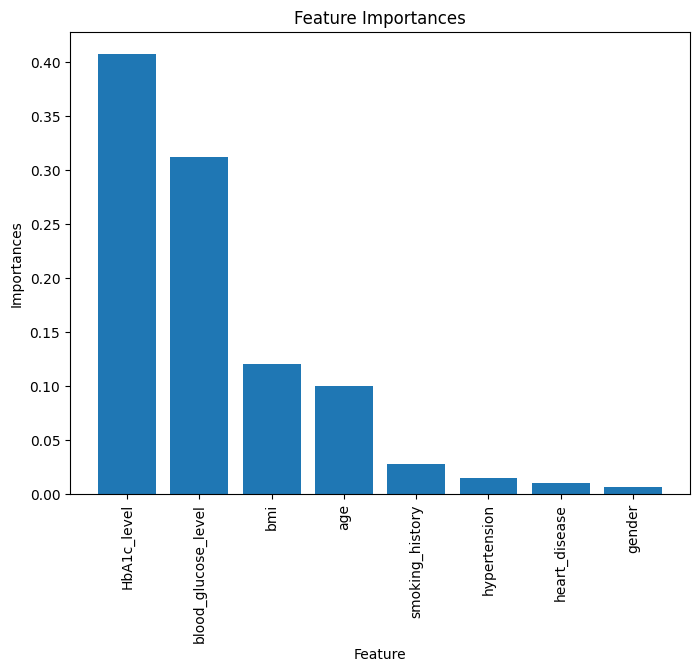

In [29]:
# Plot feature importance
plt.figure(figsize= (8, 6))
plt.bar(feat_df["Feature"], feat_df['Importances'])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importances")
plt.title("Feature Importances")
plt.show()

##NB: The plot shows that HbA1c_level which is the average blood sugar level is the highest cause of diabetes in patients.